In [1]:
# !pip install segmentation-models

In [34]:
# from unet import simple_unet_model
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
import tifffile as tiff

import tensorflow as tf
import pandas as pd
import glob
from sklearn.model_selection import train_test_split

In [3]:
IMG_HEIGHT = 512
IMG_WIDTH = 512
IMG_CHANNELS = 3

In [4]:
import cv2

# Define the desired shape
def img_read(path):
    desired_shape = (IMG_WIDTH, IMG_HEIGHT)

    # Load the image
    image = cv2.imread(path,)
    img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    # Resize the image to the desired shape
    desired_size = (IMG_WIDTH, IMG_HEIGHT)



    # Convert the image to a numpy array for further processing
    return cv2.resize(img,desired_shape, interpolation=cv2.INTER_AREA)
def msk_read(path):
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    desired_size = (IMG_WIDTH, IMG_HEIGHT)
 
    resized_image = cv2.resize(img, desired_size, interpolation=cv2.INTER_AREA)

    # Convert the image to a numpy array for further processing
    return resized_image

In [5]:
large_image_stack = []
large_mask_stack = []
import os
mask_file_names=os.listdir("Ocular_Toxoplasmosis_Data_V3\\segmentation_task\\mask_aug\\")
X=[]
y=[]

for i in mask_file_names:
    try:
        p=os.path.join("Ocular_Toxoplasmosis_Data_V3\\segmentation_task\\img_aug\\",i)
        X.append(os.path.join("Ocular_Toxoplasmosis_Data_V3\\segmentation_task\\img_aug\\",i))
        y.append(os.path.join("Ocular_Toxoplasmosis_Data_V3\\segmentation_task\\mask_aug\\",i))
        
        
    except:
        print(f'{i} does not exist in image')



for file_path in X:   
    #print('0')
    signal = img_read(file_path)/255.
    
    large_image_stack.append(signal)


for file_path in y:   
    #print('1')
    signal = msk_read(file_path)/255.
    large_mask_stack.append(signal)
   


In [6]:
large_image_stack=np.array(large_image_stack)
large_mask_stack=np.array(large_mask_stack)
large_mask_stack=np.expand_dims(large_mask_stack, -1)

In [7]:
# all_img_patches = []
# for img in range(large_image_stack.shape[0]):
#     #print(img)     #just stop here to see all file names printed
     
#     large_image = large_image_stack[img]
    
#     patches_img = patchify(large_image, (512, 512,3), step=256)  #Step=256 for 256 patches means no overlap
#     patches_img=np.squeeze(patches_img)

#     for i in range(patches_img.shape[0]):
#         for j in range(patches_img.shape[1]):
            
#             single_patch_img = patches_img[i,j,:,:]
# #             single_patch_img = single_patch_img / 255.
            
#             all_img_patches.append(single_patch_img)

In [8]:
large_image_stack.shape

(1480, 512, 512, 3)

In [9]:
# all_img_patches=np.array(all_img_patches)
# all_mask_patches=np.array(all_mask_patches)
# all_mask_patches=np.expand_dims(all_mask_patches,-1)

In [10]:
large_image_stack.shape, large_mask_stack.shape

((1480, 512, 512, 3), (1480, 512, 512, 1))

In [11]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [12]:
BACKBONE='resnet34'
preprocess_input1=sm.get_preprocessing(BACKBONE)


In [13]:
images1=preprocess_input1(large_image_stack)

In [14]:
# X_train, X_test, y_train, y_test=train_test_split(images1,large_mask_stack,random_state=42, test_size=0.25)

In [15]:
# X_train_g=X_train #[:,:,:,1]
# X_test_g=X_test
# # X_test_g=np.expand_dims(X_test[:,:,:,1],-1)

In [16]:
# X_train_g=np.zeros_like(X_train)
# X_train_g[:,:, :, 1]=X_train[:,:, :, 1]
# X_test_g=np.zeros_like(X_test)

# X_train_g[:,:, :, 1]=X_train[:,:, :, 1]
# X_test_g[:,:, :, 1]=X_test[:,:, :, 1]

In [17]:
# X_train_g.shape,y_train.shape,X_test_g.shape,y_test.shape

In [35]:
X_train_g=np.load('X_train_g.npy')
y_train=np.load('y_train.npy')

X_test_g=np.load('X_test_g.npy')
y_test=np.load('y_test.npy')

In [19]:
X_train_g.shape,y_train.shape,X_test_g.shape,y_test.shape

((1110, 512, 512, 3),
 (1110, 512, 512, 1),
 (370, 512, 512, 3),
 (370, 512, 512, 1))

In [36]:
import random
import numpy as np

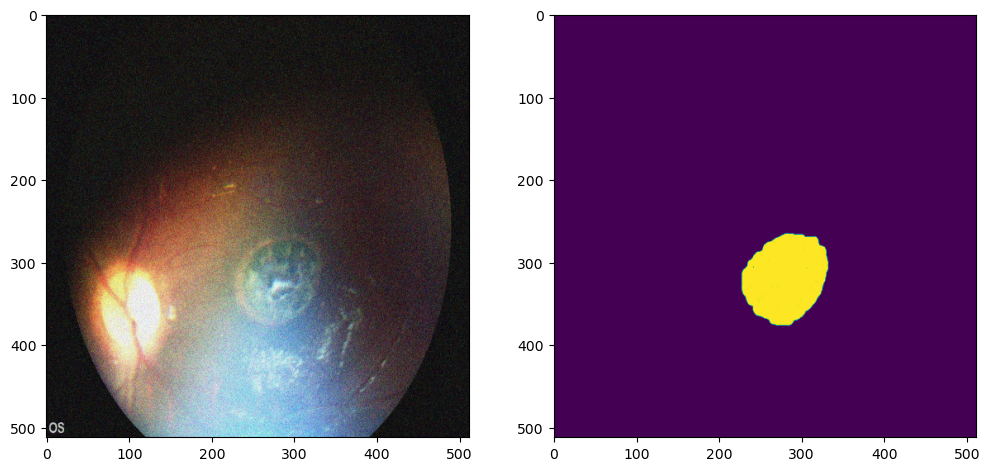

In [21]:
rng=random.randint(0,X_train_g.shape[0])
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(X_train_g[rng],cmap='gray')
plt.subplot(122)
plt.imshow(y_train[rng]);

In [24]:
seed=24
from keras.preprocessing.image import ImageDataGenerator


# img_data_gen_args=dict(
#                       rotation_range=90,

# #                       shear_range=0.5,
#                       zoom_range=0.3,
#                       horizontal_flip=True,
#                       vertical_flip=True,
# #                       fill_mode='reflect'
#                       )


# mask_data_gen_args=dict(
#                       rotation_range=90,
#                       width_shift_range=0.3,
#                       height_shift_range=0.3,
# #                       shear_range=0.5,
#                       zoom_range=0.3,
#                       horizontal_flip=True,
#                       vertical_flip=True,
# #                       fill_mode='reflect',
#                        preprocessing_function=lambda x:np.where(x>0,1,0).astype(x.dtype))

In [25]:
image_data_generator=ImageDataGenerator()
image_data_generator.fit(X_train_g,augment=False,seed=seed)

image_generator=image_data_generator.flow(X_train_g,seed=seed)
valid_img_generator=image_data_generator.flow(X_test_g,seed=seed)

In [26]:
mask_data_generator=ImageDataGenerator()
mask_data_generator.fit(y_train,augment=False,seed=seed)

mask_generator=mask_data_generator.flow(y_train,seed=seed)
valid_mask_generator=mask_data_generator.flow(y_test,seed=seed)

In [27]:
def my_image_generator(image_generator, mask_generator):
    train_generator=zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        yield (img, mask)

In [28]:
my_generator=my_image_generator(image_generator, mask_generator)

validation_datagen=my_image_generator(valid_img_generator, valid_mask_generator)

(512, 512, 3)


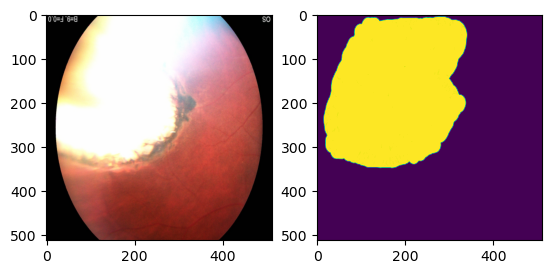

In [29]:
x=image_generator.next()
y=mask_generator.next()

for i in range(0,1):
    image=x[i]
    mask=y[i]
    print(image.shape)
    plt.subplot(121)
    plt.imshow(image)
    plt.subplot(122)
    plt.imshow(mask)

In [30]:
model=sm.Unet('vgg16',encoder_weights='imagenet')

model.compile('Adam',loss=sm.losses.bce_dice_loss,metrics=[sm.metrics.iou_score,sm.losses.bce_jaccard_loss])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   1792        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   36928       ['block1_conv1[0][0]']           
                                64)                                                           

                                                                  'block5_conv3[0][0]']           
                                                                                                  
 decoder_stage0a_conv (Conv2D)  (None, None, None,   2359296     ['decoder_stage0_concat[0][0]']  
                                256)                                                              
                                                                                                  
 decoder_stage0a_bn (BatchNorma  (None, None, None,   1024       ['decoder_stage0a_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 decoder_stage0a_relu (Activati  (None, None, None,   0          ['decoder_stage0a_bn[0][0]']     
 on)                            256)                                                              
          

 decoder_stage3a_relu (Activati  (None, None, None,   0          ['decoder_stage3a_bn[0][0]']     
 on)                            32)                                                               
                                                                                                  
 decoder_stage3b_conv (Conv2D)  (None, None, None,   9216        ['decoder_stage3a_relu[0][0]']   
                                32)                                                               
                                                                                                  
 decoder_stage3b_bn (BatchNorma  (None, None, None,   128        ['decoder_stage3b_conv[0][0]']   
 lization)                      32)                                                               
                                                                                                  
 decoder_stage3b_relu (Activati  (None, None, None,   0          ['decoder_stage3b_bn[0][0]']     
 on)      

In [31]:
callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=5, verbose=1),
#     tf.keras.callbacks.ReduceLROnPlateau(patience=3, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('Ocular_Toxoplasmosis_Data_V3\\segmentation_task\\working\\model_Xfer_vgg16_dice_loss.h5', verbose=1, save_best_only=True, save_weights_only=False)
]
history=model.fit(my_generator,validation_data=validation_datagen,steps_per_epoch=50,validation_steps=50, epochs=100,callbacks=callbacks)

Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 1.1510 - iou_score: 0.1440 - binary_crossentropy_plus_jaccard_loss: 1.2541
Epoch 1: val_loss improved from inf to 1.67134, saving model to Ocular_Toxoplasmosis_Data_V3\segmentation_task\working\model_Xfer_vgg16_dice_loss.h5
50/50 [==============================] - 123s 2s/step - loss: 1.1510 - iou_score: 0.1440 - binary_crossentropy_plus_jaccard_loss: 1.2541 - val_loss: 1.6713 - val_iou_score: 0.1761 - val_binary_crossentropy_plus_jaccard_loss: 1.8052
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 0.6799 - iou_score: 0.3208 - binary_crossentropy_plus_jaccard_loss: 0.8415
Epoch 2: val_loss did not improve from 1.67134
50/50 [==============================] - 78s 2s/step - loss: 0.6799 - iou_score: 0.3208 - binary_crossentropy_plus_jaccard_loss: 0.8415 - val_loss: 27.1285 - val_iou_score: 0.0764 - val_binary_crossentropy_plus_jaccard_loss: 27.1981
Epoch 3/100
50/50 [==============================] 

50/50 [==============================] - 80s 2s/step - loss: 0.3330 - iou_score: 0.6206 - binary_crossentropy_plus_jaccard_loss: 0.4778 - val_loss: 0.3669 - val_iou_score: 0.5997 - val_binary_crossentropy_plus_jaccard_loss: 0.5133
Epoch 20/100
50/50 [==============================] - ETA: 0s - loss: 0.3270 - iou_score: 0.6248 - binary_crossentropy_plus_jaccard_loss: 0.4700
Epoch 20: val_loss did not improve from 0.36695
50/50 [==============================] - 80s 2s/step - loss: 0.3270 - iou_score: 0.6248 - binary_crossentropy_plus_jaccard_loss: 0.4700 - val_loss: 0.4099 - val_iou_score: 0.5671 - val_binary_crossentropy_plus_jaccard_loss: 0.5623
Epoch 21/100
50/50 [==============================] - ETA: 0s - loss: 0.3162 - iou_score: 0.6369 - binary_crossentropy_plus_jaccard_loss: 0.4557
Epoch 21: val_loss did not improve from 0.36695
50/50 [==============================] - 79s 2s/step - loss: 0.3162 - iou_score: 0.6369 - binary_crossentropy_plus_jaccard_loss: 0.4557 - val_loss: 1.03

Epoch 38/100
50/50 [==============================] - ETA: 0s - loss: 0.2324 - iou_score: 0.7192 - binary_crossentropy_plus_jaccard_loss: 0.3491
Epoch 38: val_loss improved from 0.29872 to 0.29331, saving model to Ocular_Toxoplasmosis_Data_V3\segmentation_task\working\model_Xfer_vgg16_dice_loss.h5
50/50 [==============================] - 79s 2s/step - loss: 0.2324 - iou_score: 0.7192 - binary_crossentropy_plus_jaccard_loss: 0.3491 - val_loss: 0.2933 - val_iou_score: 0.6826 - val_binary_crossentropy_plus_jaccard_loss: 0.4178
Epoch 39/100
50/50 [==============================] - ETA: 0s - loss: 0.2183 - iou_score: 0.7354 - binary_crossentropy_plus_jaccard_loss: 0.3299
Epoch 39: val_loss did not improve from 0.29331
50/50 [==============================] - 78s 2s/step - loss: 0.2183 - iou_score: 0.7354 - binary_crossentropy_plus_jaccard_loss: 0.3299 - val_loss: 0.3783 - val_iou_score: 0.6040 - val_binary_crossentropy_plus_jaccard_loss: 0.5246
Epoch 40/100
50/50 [==========================

Epoch 56/100
50/50 [==============================] - ETA: 0s - loss: 0.1451 - iou_score: 0.8149 - binary_crossentropy_plus_jaccard_loss: 0.2276
Epoch 56: val_loss did not improve from 0.20315
50/50 [==============================] - 78s 2s/step - loss: 0.1451 - iou_score: 0.8149 - binary_crossentropy_plus_jaccard_loss: 0.2276 - val_loss: 0.2914 - val_iou_score: 0.6939 - val_binary_crossentropy_plus_jaccard_loss: 0.4166
Epoch 57/100
50/50 [==============================] - ETA: 0s - loss: 0.1335 - iou_score: 0.8292 - binary_crossentropy_plus_jaccard_loss: 0.2106
Epoch 57: val_loss did not improve from 0.20315
50/50 [==============================] - 79s 2s/step - loss: 0.1335 - iou_score: 0.8292 - binary_crossentropy_plus_jaccard_loss: 0.2106 - val_loss: 0.2122 - val_iou_score: 0.7650 - val_binary_crossentropy_plus_jaccard_loss: 0.3129
Epoch 58/100
50/50 [==============================] - ETA: 0s - loss: 0.1235 - iou_score: 0.8395 - binary_crossentropy_plus_jaccard_loss: 0.1965
Epoch 5

Epoch 75/100
50/50 [==============================] - ETA: 0s - loss: 0.0762 - iou_score: 0.8968 - binary_crossentropy_plus_jaccard_loss: 0.1250
Epoch 75: val_loss did not improve from 0.18377
50/50 [==============================] - 78s 2s/step - loss: 0.0762 - iou_score: 0.8968 - binary_crossentropy_plus_jaccard_loss: 0.1250 - val_loss: 0.1985 - val_iou_score: 0.7851 - val_binary_crossentropy_plus_jaccard_loss: 0.2923
Epoch 76/100
50/50 [==============================] - ETA: 0s - loss: 0.0743 - iou_score: 0.8992 - binary_crossentropy_plus_jaccard_loss: 0.1220
Epoch 76: val_loss did not improve from 0.18377
50/50 [==============================] - 79s 2s/step - loss: 0.0743 - iou_score: 0.8992 - binary_crossentropy_plus_jaccard_loss: 0.1220 - val_loss: 0.2112 - val_iou_score: 0.7760 - val_binary_crossentropy_plus_jaccard_loss: 0.3080
Epoch 77/100
50/50 [==============================] - ETA: 0s - loss: 0.0704 - iou_score: 0.9040 - binary_crossentropy_plus_jaccard_loss: 0.1161
Epoch 7

Epoch 94/100
50/50 [==============================] - ETA: 0s - loss: 0.0486 - iou_score: 0.9323 - binary_crossentropy_plus_jaccard_loss: 0.0813
Epoch 94: val_loss did not improve from 0.17698
50/50 [==============================] - 79s 2s/step - loss: 0.0486 - iou_score: 0.9323 - binary_crossentropy_plus_jaccard_loss: 0.0813 - val_loss: 0.1800 - val_iou_score: 0.8169 - val_binary_crossentropy_plus_jaccard_loss: 0.2601
Epoch 95/100
50/50 [==============================] - ETA: 0s - loss: 0.0484 - iou_score: 0.9332 - binary_crossentropy_plus_jaccard_loss: 0.0806
Epoch 95: val_loss did not improve from 0.17698
50/50 [==============================] - 80s 2s/step - loss: 0.0484 - iou_score: 0.9332 - binary_crossentropy_plus_jaccard_loss: 0.0806 - val_loss: 0.1809 - val_iou_score: 0.8176 - val_binary_crossentropy_plus_jaccard_loss: 0.2600
Epoch 96/100
50/50 [==============================] - ETA: 0s - loss: 0.0491 - iou_score: 0.9317 - binary_crossentropy_plus_jaccard_loss: 0.0820
Epoch 9

In [32]:
model=tf.keras.models.load_model('Ocular_Toxoplasmosis_Data_V3\\segmentation_task\\working\\model_Xfer_vgg16_dice_loss.h5',compile=False)

In [33]:
y_pred=model.predict(X_test_g)

NameError: name 'X_test' is not defined

In [ ]:
y_pred_thresh=y_pred>0.5
intersection=np.logical_and(y_test,y_pred_thresh)
union=np.logical_or(y_test,y_pred_thresh)
iou=np.sum(intersection)/np.sum(union)
iou

In [ ]:
test_img_num=random.randint(0,len(X_test)-1)
test_img=X_test[test_img_num]
test_img_input=np.expand_dims(test_img,0)
gt=y_test[test_img_num]
yp=model.predict(test_img_input)

plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(yp[0,:,:,0]>.5)
plt.subplot(122)
plt.imshow(gt[:,:,0])


In [ ]:
his_df=pd.DataFrame(history.history)
his_df.to_csv('Ocular_Toxoplasmosis_Data_V3\\segmentation_task\\working\\his_vgg_res.csv')

In [ ]:
desired_value_rows = his_df[his_df['val_loss'] == 0.179069]
desired_value_rows

In [ ]:
plt.imshow(gt[:,:,0])

In [ ]:
his_df

In [ ]:
desired_value_row = his_df[his_df['val_loss'] == his_df['val_loss'].min()]
desired_value_row

In [ ]:
sum(his_df['val_loss'] == 0.179069)

In [ ]:
his_df['val_loss'].min()